In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/nnair101/Documents/Python/appeal_claim1.csv')

In [54]:
df.dtypes

facility_type         object
complainant           object
cos_prov_spcl_desc    object
outcome               object
dtype: object

In [3]:
df.head()

,case_nbr,claim_site_key,facility_type,complainant,cos_prov_spcl_desc,outcome
0,ST003008AK,0096636933RAM,PHYSICIAN,Non-Par,PATHOLOGIST ...,Overturn
1,ST003008NG,0096995724RAM,PHYSICIAN,Non-Par,NEUROLOGIST ...,Overturn
2,ST003008QB,0080553619NEX,PHYSICIAN,Non-Par,HOSPITALIST ...,Overturn
3,ST003008RN,0096304638RAM,PHYSICIAN,Non-Par,FAMILY PRACTICE ...,Uphold
4,ST003009GK,0074543615ETX,PHYSICIAN,Non-Par,MEDICAL SUPPLY FIRM ...,Overturn


In [4]:
df.groupby(['outcome']).count()

,case_nbr,claim_site_key,facility_type,complainant,cos_prov_spcl_desc
outcome,,,,,
Overturn,47153,33134,33134,47153,33133
Uphold,57716,27844,27844,57716,27844


In [5]:
df = df.drop(['case_nbr'], axis = 1)
df = df.drop(['claim_site_key'], axis = 1)

In [6]:
len(df.iloc[:,0])

104869

In [7]:
df = pd.DataFrame(df)
df.isnull().sum()

facility_type         43891
complainant               0
cos_prov_spcl_desc    43892
outcome                   0
dtype: int64

In [8]:
df = df[pd.notnull(df['outcome'])]

In [9]:
df['facility_type'] = df['facility_type'].replace(np.nan, 'No_value', regex = True)
df['cos_prov_spcl_desc'] = df['cos_prov_spcl_desc'].replace(np.nan, 'No_value', regex = True)

In [10]:
df['cos_prov_spcl_desc'] = df['cos_prov_spcl_desc'].apply(lambda x: x.strip())

In [11]:
df['cos_prov_spcl_desc'] = df['cos_prov_spcl_desc'].replace('HOSPITAL NONPAR - OUT-OF-AREA', 'HOSPITAL NON-PAR OUT OF AREA', regex = True) 
df['cos_prov_spcl_desc'] = df['cos_prov_spcl_desc'].replace('HOSPITAL NONPAR-OUT-OF-AREA', 'HOSPITAL NON-PAR OUT OF AREA', regex = True) 

In [12]:
spcl_values = df['cos_prov_spcl_desc'].value_counts()
top_spcl = spcl_values[spcl_values.cumsum()/spcl_values.sum()*100 < 90]
top_spcl

No_value                        43892
HOSPITAL                        22540
HOSPITAL NON-PAR OUT OF AREA    11006
INDEPENDENT LAB                  5280
RADIOLOGIST                      2449
ANESTHESIOLOGIST                 2099
INTERNIST                        1527
FAMILY PRACTICE                  1337
PATHOLOGIST                      1090
MEDICAL SUPPLY FIRM              1023
CARDIOLOGIST                      932
ORTHOPEDIST                       647
Name: cos_prov_spcl_desc, dtype: int64

In [13]:
top_spcl_val = []
for i in range(0,len(top_spcl.keys())):
    top_spcl_val.append(top_spcl.keys()[i])
    i = i + 1

In [14]:
top_spcl_val

['No_value',
 'HOSPITAL',
 'HOSPITAL NON-PAR OUT OF AREA',
 'INDEPENDENT LAB',
 'RADIOLOGIST',
 'ANESTHESIOLOGIST',
 'INTERNIST',
 'FAMILY PRACTICE',
 'PATHOLOGIST',
 'MEDICAL SUPPLY FIRM',
 'CARDIOLOGIST',
 'ORTHOPEDIST']

In [15]:
df.loc[~df.cos_prov_spcl_desc.isin(top_spcl_val), 'cos_prov_spcl_desc'] = 'Others'

In [16]:
df['cos_prov_spcl_desc'].value_counts()

No_value                        43892
HOSPITAL                        22540
Others                          11047
HOSPITAL NON-PAR OUT OF AREA    11006
INDEPENDENT LAB                  5280
RADIOLOGIST                      2449
ANESTHESIOLOGIST                 2099
INTERNIST                        1527
FAMILY PRACTICE                  1337
PATHOLOGIST                      1090
MEDICAL SUPPLY FIRM              1023
CARDIOLOGIST                      932
ORTHOPEDIST                       647
Name: cos_prov_spcl_desc, dtype: int64

In [17]:
data_x = df.drop(['outcome'], axis = 1)
data_y = df['outcome']

In [18]:
# train & test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0, stratify= data_y)

In [51]:
X_train['facility_type_new'] = X_train[]

Index(['facility_type', 'complainant', 'cos_prov_spcl_desc'], dtype='object')

In [53]:
X_train['facility_type'].unique() 

array(['No_value', 'PHYSICIAN', 'HOSPITAL'], dtype=object)

In [56]:
for col_val in X_train['facility_type'].unique():
    new_col = 'facility_type' + col_val
    a = len(df[(df['A']>0) & (df['B']>0)])
    b = len(df)
    df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')

In [19]:
Y_train.value_counts()

Uphold      46173
Overturn    37722
Name: outcome, dtype: int64

In [20]:
Y_test.value_counts()

Uphold      11543
Overturn     9431
Name: outcome, dtype: int64

In [21]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
 
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)
X_train_ohe.head()

,facility_type_No_value,facility_type_PHYSICIAN,facility_type_HOSPITAL,complainant_Non-Par,complainant_Par,cos_prov_spcl_desc_No_value,cos_prov_spcl_desc_INDEPENDENT LAB,cos_prov_spcl_desc_FAMILY PRACTICE,cos_prov_spcl_desc_HOSPITAL,cos_prov_spcl_desc_RADIOLOGIST,cos_prov_spcl_desc_Others,cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA,cos_prov_spcl_desc_PATHOLOGIST,cos_prov_spcl_desc_ORTHOPEDIST,cos_prov_spcl_desc_ANESTHESIOLOGIST,cos_prov_spcl_desc_CARDIOLOGIST,cos_prov_spcl_desc_INTERNIST,cos_prov_spcl_desc_MEDICAL SUPPLY FIRM
65046,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
84706,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15144,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1313,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26843,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
X_train_ohe.columns

Index(['facility_type_No_value', 'facility_type_PHYSICIAN',
       'facility_type_HOSPITAL', 'complainant_Non-Par', 'complainant_Par',
       'cos_prov_spcl_desc_No_value', 'cos_prov_spcl_desc_INDEPENDENT LAB',
       'cos_prov_spcl_desc_FAMILY PRACTICE', 'cos_prov_spcl_desc_HOSPITAL',
       'cos_prov_spcl_desc_RADIOLOGIST', 'cos_prov_spcl_desc_Others',
       'cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA',
       'cos_prov_spcl_desc_PATHOLOGIST', 'cos_prov_spcl_desc_ORTHOPEDIST',
       'cos_prov_spcl_desc_ANESTHESIOLOGIST',
       'cos_prov_spcl_desc_CARDIOLOGIST', 'cos_prov_spcl_desc_INTERNIST',
       'cos_prov_spcl_desc_MEDICAL SUPPLY FIRM'],
      dtype='object')

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameter = [{'max_depth': [None, 1,10, 100, 200], 'min_samples_split': [2,5,10], 'min_samples_leaf': [1,5,10]}]
model = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'), parameter, cv=5)
model.fit(X_train_ohe, Y_train)
print(model.best_estimator_)
print(model.score(X_test_ohe, Y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.86859921808


In [40]:
from sklearn.ensemble import RandomForestClassifier
parameter = [{'max_depth': [None, 1,10, 100, 200], 'min_samples_split': [2,5,10], 'min_samples_leaf': [1,5,10]}]
model = GridSearchCV(RandomForestClassifier(class_weight= 'balanced'), parameter, cv=5)
model.fit(X_train_ohe, Y_train)
print(model.best_estimator_)
print(model.score(X_test_ohe, Y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.868742252312


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf.fit(X_train_ohe, Y_train)
print(rf.score(X_test_ohe, Y_test))

0.869123676933


In [39]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_ohe.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
complainant_Par,0.445982
complainant_Non-Par,0.384908
facility_type_PHYSICIAN,0.059206
facility_type_HOSPITAL,0.035274
cos_prov_spcl_desc_No_value,0.032988
cos_prov_spcl_desc_INDEPENDENT LAB,0.015116
facility_type_No_value,0.009984
cos_prov_spcl_desc_HOSPITAL,0.009818
cos_prov_spcl_desc_Others,0.004162
cos_prov_spcl_desc_ANESTHESIOLOGIST,0.001019


In [44]:
feature_importances.index

Index(['complainant_Par', 'complainant_Non-Par', 'facility_type_PHYSICIAN',
       'facility_type_HOSPITAL', 'cos_prov_spcl_desc_No_value',
       'cos_prov_spcl_desc_INDEPENDENT LAB', 'facility_type_No_value',
       'cos_prov_spcl_desc_HOSPITAL', 'cos_prov_spcl_desc_Others',
       'cos_prov_spcl_desc_ANESTHESIOLOGIST', 'cos_prov_spcl_desc_PATHOLOGIST',
       'cos_prov_spcl_desc_CARDIOLOGIST',
       'cos_prov_spcl_desc_MEDICAL SUPPLY FIRM',
       'cos_prov_spcl_desc_RADIOLOGIST', 'cos_prov_spcl_desc_ORTHOPEDIST',
       'cos_prov_spcl_desc_INTERNIST',
       'cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA',
       'cos_prov_spcl_desc_FAMILY PRACTICE'],
      dtype='object')

In [45]:
X_train_ohe1= X_train_ohe[['complainant_Par', 'complainant_Non-Par', 'facility_type_PHYSICIAN',
       'facility_type_HOSPITAL',
       'cos_prov_spcl_desc_INDEPENDENT LAB',
       'cos_prov_spcl_desc_HOSPITAL',
       'cos_prov_spcl_desc_ANESTHESIOLOGIST']]

In [46]:
X_test_ohe1= X_test_ohe[['complainant_Par', 'complainant_Non-Par', 'facility_type_PHYSICIAN',
       'facility_type_HOSPITAL',
       'cos_prov_spcl_desc_INDEPENDENT LAB',
       'cos_prov_spcl_desc_HOSPITAL',
       'cos_prov_spcl_desc_ANESTHESIOLOGIST']]

In [116]:
# X_test_ohe1= X_test_ohe[['complainant_Par', 'complainant_Non-Par', 'facility_type_PHYSICIAN',
#        'facility_type_No_value', 'cos_prov_spcl_desc_Others',
#        'cos_prov_spcl_desc_No_value', 'facility_type_HOSPITAL',
#        'cos_prov_spcl_desc_INDEPENDENT LAB', 'cos_prov_spcl_desc_PATHOLOGIST',
#        'cos_prov_spcl_desc_ANESTHESIOLOGIST', 'cos_prov_spcl_desc_RADIOLOGIST',
#        'cos_prov_spcl_desc_MEDICAL SUPPLY FIRM', 'cos_prov_spcl_desc_HOSPITAL',
#        'cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA',
#        'cos_prov_spcl_desc_INTERNIST', 'cos_prov_spcl_desc_CARDIOLOGIST',
#        'cos_prov_spcl_desc_FAMILY PRACTICE', 'cos_prov_spcl_desc_ORTHOPEDIST']]

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameter = [{'max_depth': [None, 1,10, 100, 200], 'min_samples_split': [2,5,10], 'min_samples_leaf': [1,5,10]}]
model = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'), parameter, cv=5)
model.fit(X_train_ohe1, Y_train)
print(model.best_estimator_)
print(model.score(X_test_ohe1, Y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.86859921808


In [47]:
data_feat = X_train_ohe1.append(X_test_ohe1, ignore_index = True)
data_class = Y_train.append(Y_test, ignore_index = True)

In [48]:
clf = DecisionTreeClassifier(criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
clf.fit(data_feat, data_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
import graphviz 
from sklearn import tree 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render('data') 

dotfile = open("dtree12.dot", 'w')
dot_data = tree.export_graphviz(clf, out_file=dotfile, feature_names=data_feat.columns,
                                class_names=clf.classes_,filled=True, rounded=True,
                                special_characters=True)  
dotfile.close()
# graph = graphviz.Source(dot_data)  
# graph 

In [95]:
model1 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
print(model.score(X_test_ohe, Y_test))

0.86859921808


In [99]:
clf.classes_

array(['Overturn', 'Uphold'], dtype=object)

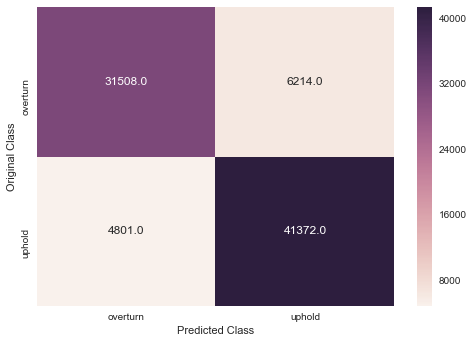

In [86]:
#plotting confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
C = confusion_matrix(Y_train, model.predict(X_train_ohe))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["overturn","uphold"], yticklabels=["overturn","uphold"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

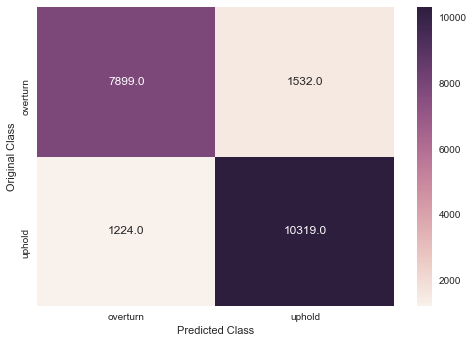

In [87]:
#plotting confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
C = confusion_matrix(Y_test, model.predict(X_test_ohe))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["overturn","uphold"], yticklabels=["overturn","uphold"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [88]:
data_feat = X_train_ohe.append(X_test_ohe, ignore_index = True)
data_class = Y_train.append(Y_test, ignore_index = True)

In [103]:
data_feat.columns

Index(['facility_type_No_value', 'facility_type_PHYSICIAN',
       'facility_type_HOSPITAL', 'complainant_Non-Par', 'complainant_Par',
       'cos_prov_spcl_desc_No_value', 'cos_prov_spcl_desc_INDEPENDENT LAB',
       'cos_prov_spcl_desc_FAMILY PRACTICE', 'cos_prov_spcl_desc_HOSPITAL',
       'cos_prov_spcl_desc_RADIOLOGIST', 'cos_prov_spcl_desc_Others',
       'cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA',
       'cos_prov_spcl_desc_PATHOLOGIST', 'cos_prov_spcl_desc_ORTHOPEDIST',
       'cos_prov_spcl_desc_ANESTHESIOLOGIST',
       'cos_prov_spcl_desc_CARDIOLOGIST', 'cos_prov_spcl_desc_INTERNIST',
       'cos_prov_spcl_desc_MEDICAL SUPPLY FIRM'],
      dtype='object')

In [ ]:
facility_type_HOSPITAL
complainant_Par
cos_prov_spcl_desc_No_value
cos_prov_spcl_desc_Others
cos_prov_spcl_desc_CARDIOLOGIST
cos_prov_spcl_desc_FAMILY PRACTICE
cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA
cos_prov_spcl_desc_INTERNIST
cos_prov_spcl_desc_ORTHOPEDIST
cos_prov_spcl_desc_HOSPITAL
cos_prov_spcl_desc_RADIOLOGIST
cos_prov_spcl_desc_INDEPENDENT LAB
cos_prov_spcl_desc_MEDICAL SUPPLY FIRM
cos_prov_spcl_desc_PATHOLOGIST
cos_prov_spcl_desc_ANESTHESIOLOGIST
facility_type_PHYSICIAN
facility_type_No_value
complainant_Non-Par

In [91]:
data_feat.head()

,facility_type_No_value,facility_type_PHYSICIAN,facility_type_HOSPITAL,complainant_Non-Par,complainant_Par,cos_prov_spcl_desc_No_value,cos_prov_spcl_desc_INDEPENDENT LAB,cos_prov_spcl_desc_FAMILY PRACTICE,cos_prov_spcl_desc_HOSPITAL,cos_prov_spcl_desc_RADIOLOGIST,cos_prov_spcl_desc_Others,cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA,cos_prov_spcl_desc_PATHOLOGIST,cos_prov_spcl_desc_ORTHOPEDIST,cos_prov_spcl_desc_ANESTHESIOLOGIST,cos_prov_spcl_desc_CARDIOLOGIST,cos_prov_spcl_desc_INTERNIST,cos_prov_spcl_desc_MEDICAL SUPPLY FIRM
0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [125]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
clf.fit(X_train_ohe1, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [124]:
X_train_ohe1.columns

Index(['complainant_Par', 'complainant_Non-Par', 'facility_type_PHYSICIAN',
       'facility_type_HOSPITAL', 'cos_prov_spcl_desc_INDEPENDENT LAB',
       'cos_prov_spcl_desc_PATHOLOGIST', 'cos_prov_spcl_desc_ANESTHESIOLOGIST',
       'cos_prov_spcl_desc_RADIOLOGIST',
       'cos_prov_spcl_desc_MEDICAL SUPPLY FIRM',
       'cos_prov_spcl_desc_HOSPITAL'],
      dtype='object')

In [129]:
import graphviz 
from sklearn import tree 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render('data') 

dotfile = open("dtree9.dot", 'w')
dot_data = tree.export_graphviz(clf, out_file=dotfile, feature_names=X_train_ohe1.columns,
                                class_names=clf.classes_,filled=True, rounded=True,
                                special_characters=True)  
dotfile.close()
# graph = graphviz.Source(dot_data)  
# graph 

In [101]:
bow_feature_names = data_feat.columns
w = clf.feature_importances_
#w_new = (w.T).reshape(w.shape[1],) 
ranking_index = np.argsort(w)
top_20 = ranking_index[-20:]
for index in top_20:
    print(bow_feature_names[index])

facility_type_HOSPITAL
complainant_Par
cos_prov_spcl_desc_No_value
cos_prov_spcl_desc_Others
cos_prov_spcl_desc_CARDIOLOGIST
cos_prov_spcl_desc_FAMILY PRACTICE
cos_prov_spcl_desc_HOSPITAL NON-PAR OUT OF AREA
cos_prov_spcl_desc_INTERNIST
cos_prov_spcl_desc_ORTHOPEDIST
cos_prov_spcl_desc_HOSPITAL
cos_prov_spcl_desc_RADIOLOGIST
cos_prov_spcl_desc_INDEPENDENT LAB
cos_prov_spcl_desc_MEDICAL SUPPLY FIRM
cos_prov_spcl_desc_PATHOLOGIST
cos_prov_spcl_desc_ANESTHESIOLOGIST
facility_type_PHYSICIAN
facility_type_No_value
complainant_Non-Par


In [102]:
top_20

array([ 2,  4,  5, 10, 15,  7, 11, 16, 13,  8,  9,  6, 17, 12, 14,  1,  0,
        3], dtype=int64)